In [19]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2
#!pip install xarray

In [20]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [21]:
ls

Untitled.ipynb  pandas_analysis-Copy1.ipynb


## A

In [22]:
#rdir = '/workspace'
rdir = '../'

dat_files = natsort(glob2.glob(rdir + '/results/A/**/*.dat'))


len(dat_files)
#dat_files

5

In [23]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [24]:
dat_files, len(columns2)

(['..//results/A/1/results_modelA_1.dat',
  '..//results/A/2/results_modelA_2.dat',
  '..//results/A/3/results_modelA_3.dat',
  '..//results/A/4/results_modelA_4.dat',
  '..//results/A/5/results_modelA_5.dat'],
 30)

In [25]:
data = []
realtime = []
gooddata = []
area = []
col = 'rmsSurfScaled'

for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
        df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
        realtime.append(df['realtimeScaled'])
        area.append(df['areaintRock'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [26]:
len(gooddata)

4

In [29]:



columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

df = pd.read_csv(dat_files[4], sep="\s*", header=None,  index_col=False)
df.columns = columns3

df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


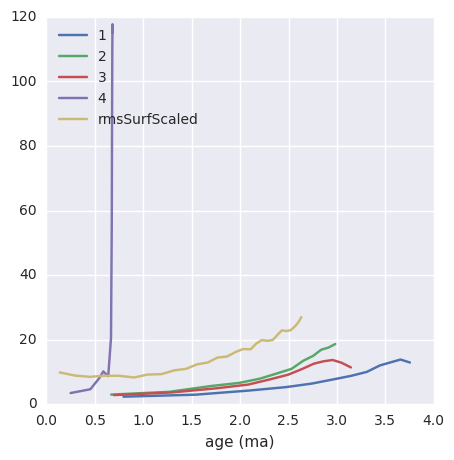

In [30]:

fig, ax = plt.subplots(figsize=(5,5))

for i in range(0, realtime.shape[0]):
    #c = inv_map[params[i][1]]
    #if params[i][1] >= 1.:
    ax.plot(realtime[i], data[i]/3.4,label=(str(i+1)) )

plt.plot(df['realtimeScaled'] , df['rmsSurfScaled'] )
    
#ax.set_xlim(1., 200.)
#ax.set_ylim(-0.7, 0.7)
ax.legend(loc=2)
#ax.set_title('hmm')
#ax.set_ylabel('RMS surface velocity (cm/y)')
ax.set_xlabel('age (ma)')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.axhline(1., c='k', ls='--')

In [10]:
len(data[0])

12

In [21]:
data[0]

0     8.071189
1    10.161638
2    14.518545
3    18.125336
4    21.848213
5    26.194189
6    29.998285
7    34.173417
8    40.892582
9    44.232677
Name: rmsSurfScaled, dtype: float64

In [22]:
df

,areaintRock,tempintRock,rmsintRock,dwintRock,vdintRock,areaintLith,tempintLith,rmsintLith,dwintLith,vdintLith,...,rmsSurf,nuTop,nuBottom,plateness,subzone,lRidge,rRidge,realtime,rmsSurfScaled,realtimeScaled
0,2.344828,1.517226,1059.600638,9.402126,5.935741e+10,0.071550,0.017571,263.803482,-7.530078,3.124013e+10,...,10937.402465,-138.413925,-1.620848,2.388411,0.000000,-1.697786,1.697786,9.395571e-07,11.893859,0.250560
1,2.344828,1.517114,1545.531628,19.505731,1.205034e+11,0.071954,0.017694,398.789776,-16.630258,6.363176e+10,...,14635.361063,-136.146646,-1.500275,2.611979,0.008854,-1.697786,1.697786,1.705456e-06,15.915198,0.454810
2,2.344828,1.517058,3020.550716,74.362461,4.632892e+11,0.072169,0.017774,775.082015,-67.050680,2.672982e+11,...,25408.073421,-136.847818,-1.450962,2.735323,-0.002214,-1.697786,1.697786,2.050133e-06,27.629966,0.546728
3,2.344828,1.517022,4033.143938,108.164553,6.832556e+11,0.072268,0.017821,1017.412278,-97.805366,4.016498e+11,...,31837.995204,-141.152874,-1.429846,2.580990,-0.017708,-1.697786,1.697786,2.204121e-06,34.622173,0.587793
4,2.344828,1.516978,3514.063918,91.989796,5.762990e+11,0.072374,0.017867,901.916043,-79.386525,3.552812e+11,...,27223.898625,-145.509231,-1.404436,2.658464,-0.008854,-1.697786,1.697786,2.394818e-06,29.604582,0.638648
5,2.344828,1.516948,8100.894797,314.539231,1.941363e+12,0.072423,0.017891,2198.705327,-257.092044,1.152927e+12,...,64446.467663,-149.903208,-1.390362,2.797917,-0.011068,-1.697786,1.697786,2.503112e-06,70.082200,0.667528
6,2.344828,1.516927,23794.946639,1137.419824,7.005095e+12,0.072426,0.017902,6483.218794,-915.110783,3.491814e+12,...,176365.686178,-156.838300,-1.386565,2.718229,-0.017708,-1.697786,1.697786,2.532669e-06,191.788561,0.675411
7,2.344828,1.516906,44606.558444,2226.964922,1.378353e+13,0.072430,0.017917,11485.825610,-1786.239285,5.565518e+12,...,284941.689557,-164.154137,-1.384999,2.718229,-0.019922,-1.697786,1.697786,2.544899e-06,309.859349,0.678672


In [23]:
df = pd.read_csv(dat_files[0], sep="\s*", header=None,  index_col=False)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [24]:
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2.344828,1.516951,648.292283,3.308838,1.950222e+09,0.072437,0.017768,157.037191,-2.524265,9.641004e+08,...,3.330938e+07,3.330938e+07,7422.135961,-130.915982,-1.329167,3.061328,0.013281,-1.697786,1.697786,0.000003
1,2.344828,1.516587,857.602171,4.799446,2.898236e+09,0.073711,0.018092,218.746658,-4.136820,1.260920e+09,...,5.333427e+07,5.333427e+07,9344.478929,-125.218169,-1.061323,3.076823,0.000000,-1.697786,1.697786,0.000006
2,2.344828,1.516319,1202.585040,6.948310,4.453471e+09,0.074624,0.018327,327.865451,-6.469376,1.729640e+09,...,1.224169e+08,1.224169e+08,13351.020946,-122.976267,-0.923711,3.028125,-0.006641,-1.695573,1.695573,0.000008
3,2.344828,1.516134,1522.125541,10.916118,6.307536e+09,0.075292,0.018510,434.399214,-9.349145,2.277128e+09,...,2.080761e+08,2.080761e+08,16667.768205,-122.298249,-0.850234,2.986068,0.002214,-1.697786,1.695573,0.000009
4,2.344828,1.516002,1819.975517,13.424260,8.091257e+09,0.075752,0.018638,533.622179,-11.891891,2.886528e+09,...,2.334278e+08,2.334278e+08,20091.266504,-122.240165,-0.806264,2.944010,0.000000,-1.697786,1.695573,0.000010
5,2.344828,1.515892,2165.616621,17.569459,1.029365e+10,0.076131,0.018745,645.120178,-15.277845,3.537903e+09,...,3.273615e+08,3.273615e+08,24087.756390,-122.487782,-0.774062,2.957292,-0.015495,-1.697786,1.695573,0.000011
6,2.344828,1.515795,2480.070990,21.233203,1.277777e+10,0.076443,0.018834,743.323249,-18.917404,4.497654e+09,...,4.286423e+08,4.286423e+08,27585.941797,-123.028027,-0.749008,2.928516,-0.002214,-1.697786,1.695573,0.000012
7,2.344828,1.515708,2852.492646,26.661627,1.636385e+10,0.076714,0.018914,857.635057,-23.991251,5.850400e+09,...,4.660280e+08,4.660280e+08,31425.326694,-123.734659,-0.728803,2.906380,-0.004427,-1.697786,1.695573,0.000012
8,2.344828,1.515634,3433.559101,35.378919,2.181160e+10,0.076925,0.018978,1036.985795,-31.678821,7.417314e+09,...,5.113640e+08,5.113640e+08,37604.163117,-124.665540,-0.713326,2.839974,-0.015495,-1.697786,1.695573,0.000013
9,2.344828,1.515569,3768.127958,41.902937,2.562917e+10,0.077117,0.019040,1138.598188,-37.377301,8.299672e+09,...,4.910992e+08,4.910992e+08,40675.660823,-125.679214,-0.700855,2.827308,-0.013281,-1.697786,1.695573,0.000013


In [12]:
len(columns2)

35

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


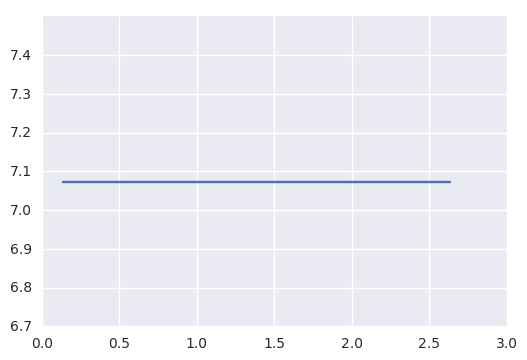

In [37]:
plt.plot(df['realtimeScaled'] , (df['maxVel']/(2900.*1e3/1e-6))*(1e2*3600*24*365) )